In [ ]:
!pip install -r requirements.txt


--- Loading and Preprocessing Training Data from: data\train_cleaned.txt ---
Training samples before de-duplication: 15970
Training samples after de-duplication (based on cleaned text): 15969
Total words in corpus before Vocab_Size limit: 15210
Unique labels: ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
Number of classes: 6
Shape of X_train: (15969, 120), y_train: (15969, 6)


C:\Users\azama\AppData\Local\Temp\ipykernel_15972\3321579024.py:278: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_counts.index, y=df_counts['count'], palette="viridis")


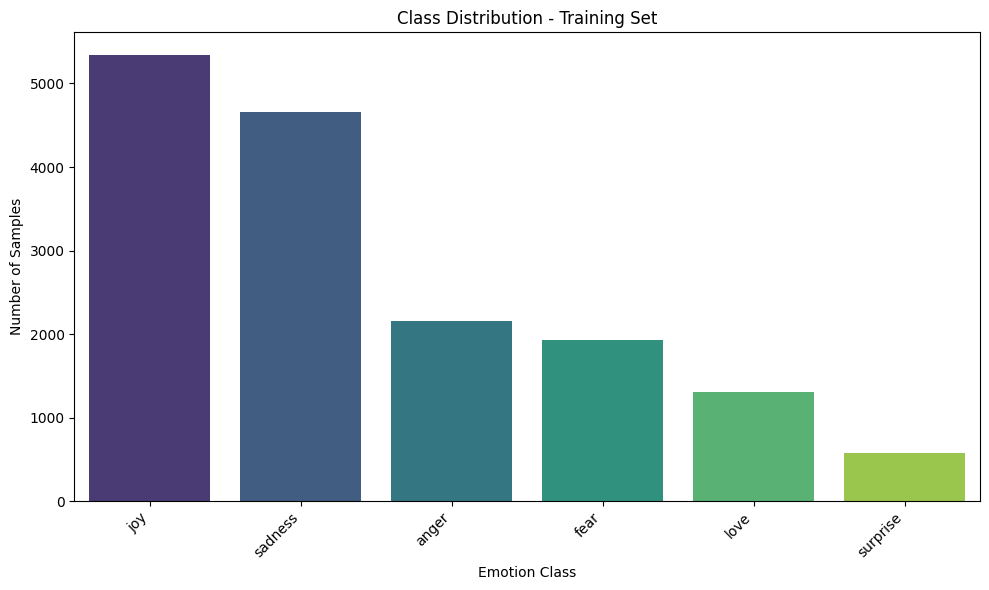


--- Loading and Preprocessing Validation Data from: data\val_cleaned.txt ---
Shape of X_val: (1993, 120), y_val: (1993, 6)


C:\Users\azama\AppData\Local\Temp\ipykernel_15972\3321579024.py:278: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_counts.index, y=df_counts['count'], palette="viridis")


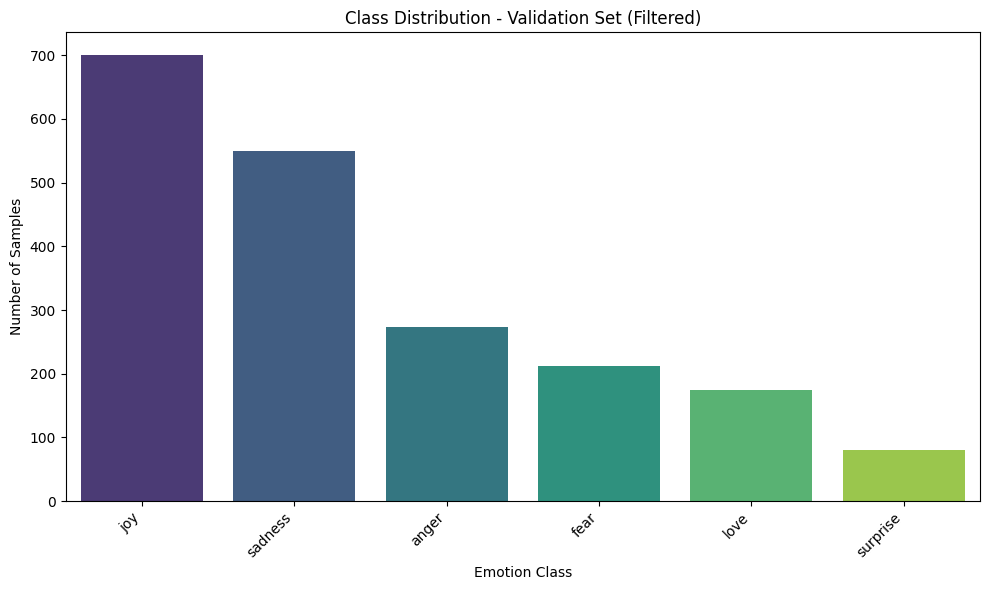


--- Loading and Preprocessing Classification/Test Data from: data\test_cleaned.txt ---
Shape of X_test: (1986, 120), y_test: (1986, 6)


C:\Users\azama\AppData\Local\Temp\ipykernel_15972\3321579024.py:278: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_counts.index, y=df_counts['count'], palette="viridis")


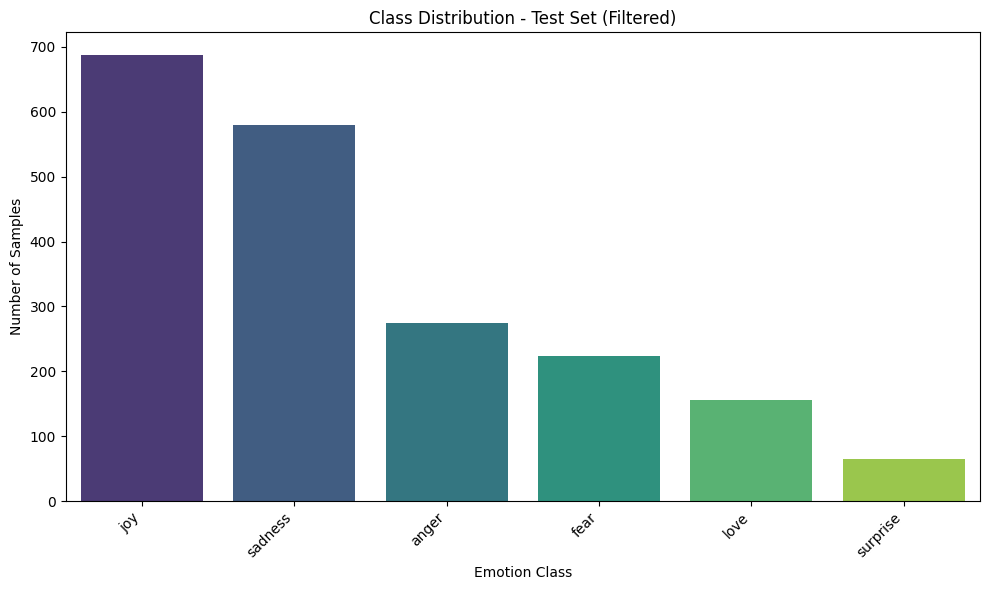


--- Creating Word2Vec Embeddings ---
Training Word2Vec model...
Word2Vec vocabulary size: 15135
Shape of embedding matrix: (15000, 100)

--- Building Model ---

--- Starting Model Training ---
Epoch 1/50


c:\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 116ms/step - accuracy: 0.3254 - loss: 1.6013 - val_accuracy: 0.2780 - val_loss: 1.5864 - learning_rate: 0.0010
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.5882 - loss: 1.1085 - val_accuracy: 0.9197 - val_loss: 0.2311 - learning_rate: 0.0010
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 133ms/step - accuracy: 0.9331 - loss: 0.1823 - val_accuracy: 0.9277 - val_loss: 0.1682 - learning_rate: 0.0010
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.9393 - loss: 0.1327 - val_accuracy: 0.9338 - val_loss: 0.1653 - learning_rate: 0.0010
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 134ms/step - accuracy: 0.9445 - loss: 0.1148 - val_accuracy: 0.9328 - val_loss: 0.1565 - learning_rate: 0.0010
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - accuracy: 0.9553 - loss: 0.0989 - val_accuracy: 0.9358 - val_loss: 0.1489 - learning_rate: 0.0010
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step - accuracy: 0.9585 - loss:

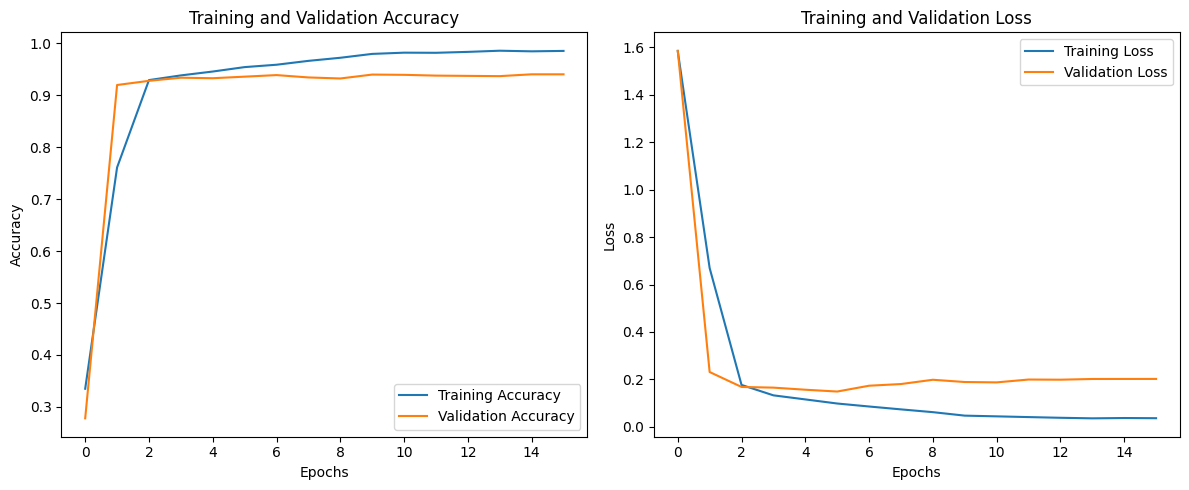


Saving model to emotion_classifier_model_learned_embeddings.keras
Saving tokenizer to emotion_tokenizer.json
Saving label_to_int map to emotion_label_map_to_int.json
Saving int_to_label map to emotion_label_map_int_to.json
All components saved.
Saved Model Size: 20.09 MB

--- Evaluating on Classification/Test Data ---
Overall Test Accuracy: 93.40%
Overall Test Loss: 0.1403
Total Inference Time for Test Set: 1.82 seconds
Average Inference Time per Sample: 0.91 ms

Classification Report (Test Set):
              precision    recall  f1-score   support

       anger       0.97      0.91      0.94       274
        fear       0.87      0.91      0.89       224
         joy       0.94      0.97      0.95       688
        love       0.90      0.79      0.84       156
     sadness       0.96      0.98      0.97       579
    surprise       0.81      0.74      0.77        65

    accuracy                           0.93      1986
   macro avg       0.91      0.88      0.89      1986
weighted 

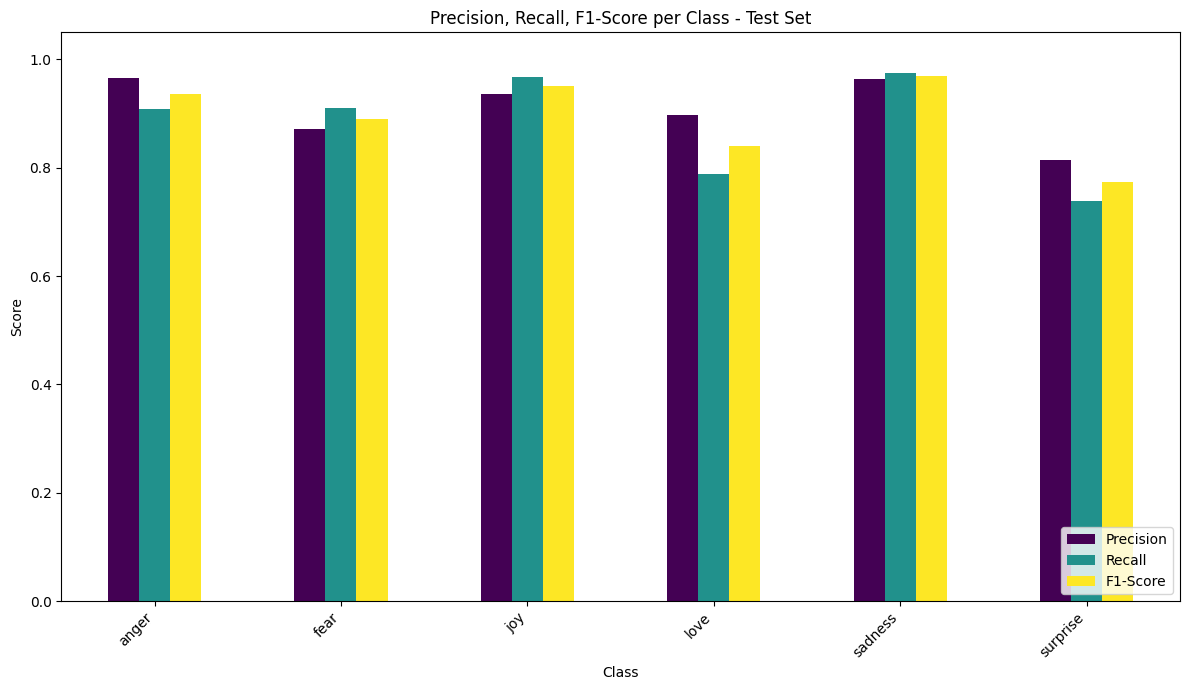

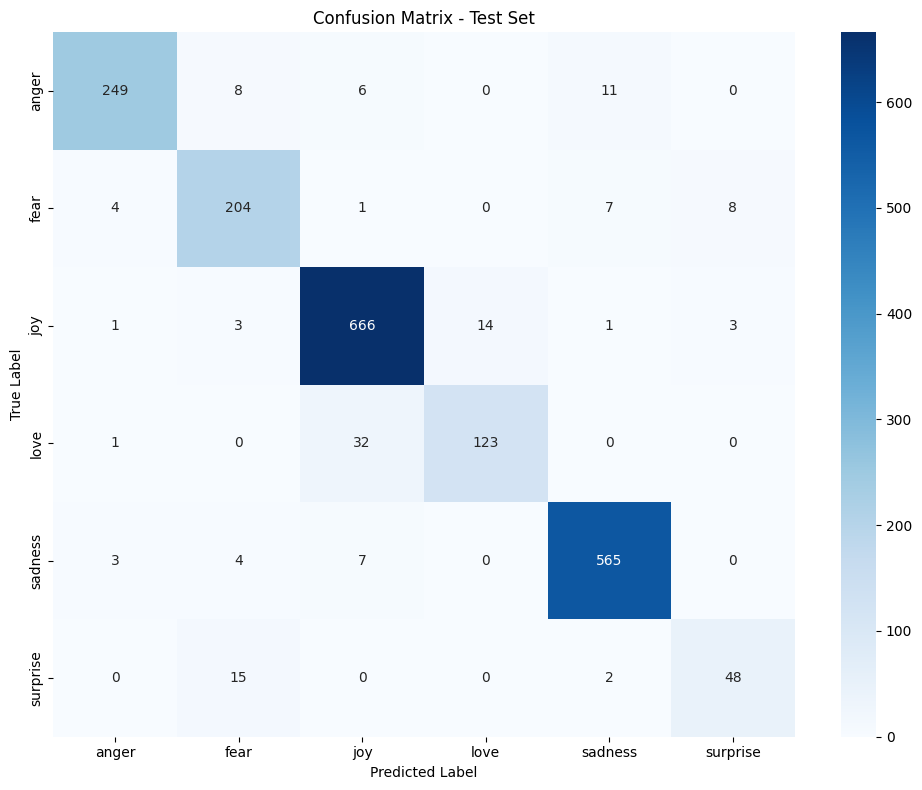


Matthews Correlation Coefficient (MCC): 0.9125

--- Predictions on New Examples (using trained model) ---

Input text: 'i am feeling grouchy'
Cleaned text: 'i am feeling grouchy'
Predicted emotion: anger (Inference time: 49.25 ms)

Input text: 'this is the best day ever, i'm so happy!'
Cleaned text: 'this is the best day ever i'm so happy!'
Predicted emotion: joy (Inference time: 55.18 ms)

--- Testing Loaded Model for Prediction ---

Input text: 'That was a terrifying experience, I'm still shaking.'
Cleaned text: 'that was a terrifying experience i'm still shaking'
Predicted emotion: anger (Inference time: 292.83 ms)


In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced visualizations
import re
import os
import json
import time
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
from typing import List, Tuple, Dict, Optional, Any, Set
from tensorflow.keras.layers import Bidirectional, LSTM, Attention, GlobalAveragePooling1D
from collections import Counter # For class distribution
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# --- Configuration --- (Same as before)
VOCAB_SIZE = 15000
EMBEDDING_DIM = 100
MAX_LENGTH = 120
OOV_TOK = "<OOV>"
DROPOUT_RATE = 0.02
DENSE_UNITS = 64
CONV_FILTERS = 128
CONV_KERNEL_SIZE = 5
EPOCHS = 50
BATCH_SIZE = 16

MODEL_SAVE_PATH = "emotion_classifier_model_learned_embeddings.keras"
TOKENIZER_SAVE_PATH = "emotion_tokenizer.json"
LABEL_MAP_SAVE_PREFIX = "emotion_label_map"
PLOTS_SAVE_DIR = "presentation_plots" # Directory to save plots
TRAIN_FILEPATH = r"data\train_cleaned.txt"
VALIDATION_FILEPATH = r"data\val_cleaned.txt"
CLASSIFICATION_FILEPATH = r"data\test_cleaned.txt"

# --- Create directory for plots if it doesn't exist ---
if not os.path.exists(PLOTS_SAVE_DIR):
    os.makedirs(PLOTS_SAVE_DIR)

# --- Helper Functions ---

def preprocess_for_word2vec(texts: List[str]) -> List[List[str]]:
    """
    Preprocess text data for Word2Vec training.
    Returns a list of tokenized sentences.
    """
    tokenized_texts = []
    for text in texts:
        # Use gensim's simple_preprocess for tokenization
        tokens = simple_preprocess(text, deacc=True)  # deacc=True removes punctuation
        tokenized_texts.append(tokens)
    return tokenized_texts

def create_word2vec_embeddings(texts: List[str], vocab_size: int, embedding_dim: int, tokenizer: Tokenizer) -> Tuple[Word2Vec, np.ndarray]:
    """
    Create and train Word2Vec model, then create embedding matrix for Keras.
    Returns the Word2Vec model and embedding matrix.
    """
    # Preprocess and tokenize texts
    tokenized_texts = preprocess_for_word2vec(texts)
    
    # Train Word2Vec model
    print("Training Word2Vec model...")
    word2vec_model = Word2Vec(
        sentences=tokenized_texts,
        vector_size=embedding_dim,
        window=5,  # Context window size
        min_count=1,  # Minimum word frequency
        workers=4,  # Number of CPU cores to use
        sg=1  # Use skip-gram model
    )
    print(f"Word2Vec vocabulary size: {len(word2vec_model.wv.key_to_index)}")
    
    # Create embedding matrix for Keras
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i >= vocab_size:
            continue
        try:
            embedding_vector = word2vec_model.wv[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            # Words not found in embedding index will be zeros
            continue
            
    print(f"Shape of embedding matrix: {embedding_matrix.shape}")
    return word2vec_model, embedding_matrix

def build_emotion_model(
    input_dim_vocab: int,
    embedding_dim_val: int,
    max_len_val: int,
    dense_u: int,
    lstm_units: int = 128,
    drop_rate: float = 0.5,
    num_classes_val: int = 6,
    embedding_matrix: Optional[np.ndarray] = None
) -> Sequential | tf.keras.Model:
    """
    Build the emotion classification model with optional pre-trained embeddings
    """
    inputs = tf.keras.Input(shape=(max_len_val,))
    
    # Embedding layer (with or without pre-trained embeddings)
    if embedding_matrix is not None:
        x = Embedding(
            input_dim=input_dim_vocab,
            output_dim=embedding_dim_val,
            weights=[embedding_matrix],
            input_length=max_len_val,
            trainable=True  # Keep pre-trained embeddings fixed
        )(inputs)
    else:
        x = Embedding(
            input_dim=input_dim_vocab,
            output_dim=embedding_dim_val,
            input_length=max_len_val
        )(inputs)
    
    # Bidirectional LSTM outputs a sequence
    x = Bidirectional(LSTM(lstm_units,
                          return_sequences=True,
                          dropout=0.25,
                          recurrent_dropout=0.25))(x)
    
    # Self-attention
    attn_out = Attention()([x, x])
    
    # Pool across time
    x_pool = GlobalAveragePooling1D()(attn_out)
    
    # Classification head
    x_dense = Dense(dense_u, activation='relu')(x_pool)
    x_drop = Dropout(drop_rate)(x_dense)
    outputs = Dense(num_classes_val, activation='softmax')(x_drop)
    
    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def load_raw_data_from_file(filepath: str) -> Tuple[List[str], List[str]]:
    texts: List[str] = []
    labels: List[str] = []
    if not os.path.exists(filepath):
        print(f"ERROR: File {filepath} not found. Please check the path.")
        return texts, labels
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            for line_num, line in enumerate(f, 1):
                line = line.strip()
                if ';' in line:
                    text, label_str = line.split(';', 1)
                    texts.append(text)
                    labels.append(label_str.strip())
                elif line:
                    print(f"Warning: Malformed line {line_num} in {filepath} (no ';'): {line}")
    except Exception as e:
        print(f"Error reading file {filepath}: {e}")
    return texts, labels

def clean_text_data(texts_list: List[str]) -> List[str]:
    cleaned_texts: List[str] = []
    for text in texts_list:
        text = text.lower()
        text = re.sub(r"[^a-z0-9\s!?']", "", text)
        text = re.sub(r'\s+', ' ', text).strip()
        cleaned_texts.append(text)
    return cleaned_texts

def process_and_filter_data(
    raw_texts: List[str],
    raw_labels: List[str],
    tokenizer: Tokenizer,
    label_to_int_map: Dict[str, int],
    max_len: int,
    num_classes_for_ohe: int,
    training_cleaned_texts_set: Optional[Set[str]] = None
) -> Tuple[np.ndarray, np.ndarray, List[str], List[str]]:
    cleaned_texts_list = clean_text_data(raw_texts)
    
    filtered_raw_texts: List[str] = []
    filtered_raw_labels: List[str] = []
    filtered_cleaned_texts: List[str] = []

    if training_cleaned_texts_set:
        # print(f"Original samples: {len(cleaned_texts_list)}. Filtering against training set...")
        for i, cleaned_text in enumerate(cleaned_texts_list):
            if cleaned_text not in training_cleaned_texts_set:
                filtered_raw_texts.append(raw_texts[i])
                filtered_raw_labels.append(raw_labels[i])
                filtered_cleaned_texts.append(cleaned_text)
        # print(f"Samples after filtering: {len(filtered_cleaned_texts)}.")
    else:
        filtered_raw_texts = raw_texts
        filtered_raw_labels = raw_labels
        filtered_cleaned_texts = cleaned_texts_list

    if not filtered_cleaned_texts:
        return np.array([]), np.array([]), [], []

    sequences = tokenizer.texts_to_sequences(filtered_cleaned_texts)
    padded_sequences_arr = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

    processed_int_labels: List[int] = []
    valid_indices_for_labels: List[int] = []

    for i, label in enumerate(filtered_raw_labels):
        if label in label_to_int_map:
            processed_int_labels.append(label_to_int_map[label])
            valid_indices_for_labels.append(i)
        else:
            print(f"Warning: Label '{label}' from (val/test) not found in training label_to_int_map. Skipping sample: '{filtered_raw_texts[i]}'")

    if not processed_int_labels:
        return np.array([]), np.array([]), [], []

    integer_labels_arr = np.array(processed_int_labels)
    one_hot_labels_arr = to_categorical(integer_labels_arr, num_classes=num_classes_for_ohe)
    
    final_padded_sequences = padded_sequences_arr[valid_indices_for_labels]
    final_raw_texts = [filtered_raw_texts[i] for i in valid_indices_for_labels]
    final_raw_labels = [filtered_raw_labels[i] for i in valid_indices_for_labels]

    return final_padded_sequences, one_hot_labels_arr, final_raw_texts, final_raw_labels

# --- Visualization Functions ---
def plot_training_history(history_obj: tf.keras.callbacks.History, model_has_validation: bool, save_dir: str):
    acc = history_obj.history['accuracy']
    loss = history_obj.history['loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    if model_has_validation and 'val_accuracy' in history_obj.history:
        val_acc = history_obj.history['val_accuracy']
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    if model_has_validation and 'val_loss' in history_obj.history:
        val_loss = history_obj.history['val_loss']
        plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "training_history.png"))
    plt.show()

def plot_class_distribution(labels_list: List[str], title: str, save_dir: str, filename: str):
    if not labels_list:
        print(f"Cannot plot class distribution for '{title}', no labels provided.")
        return
        
    label_counts = Counter(labels_list)
    df_counts = pd.DataFrame.from_dict(label_counts, orient='index', columns=['count']).sort_values('count', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_counts.index, y=df_counts['count'], palette="viridis")
    plt.title(f'Class Distribution - {title}')
    plt.xlabel('Emotion Class')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, filename))
    plt.show()

def plot_confusion_matrix_heatmap(y_true_classes: np.ndarray, y_pred_classes: np.ndarray, class_names: List[str], save_dir: str):
    cm = confusion_matrix(y_true_classes, y_pred_classes, labels=list(range(len(class_names))))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Test Set')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
    plt.show()

def plot_classification_report_metrics(report: Dict, class_names: List[str], save_dir: str):
    # Extract per-class metrics
    metrics_data = []
    for cls_name in class_names:
        if cls_name in report:
            metrics_data.append([
                cls_name,
                report[cls_name]['precision'],
                report[cls_name]['recall'],
                report[cls_name]['f1-score']
            ])
    
    metrics_df = pd.DataFrame(metrics_data, columns=['Class', 'Precision', 'Recall', 'F1-Score'])
    
    # Plotting
    metrics_df.set_index('Class').plot(kind='bar', figsize=(12, 7), colormap="viridis")
    plt.title('Precision, Recall, F1-Score per Class - Test Set')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1.05) # Scores are between 0 and 1
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "classification_metrics_per_class.png"))
    plt.show()

# --- save_model_components, load_model_components (same as before)
def save_model_components(
    model: Sequential, tokenizer: Tokenizer, label_to_int_map: Dict[str, int],
    int_to_label_map: Dict[int, str], model_path: str, tokenizer_path: str, label_map_prefix: str
):
    print(f"\nSaving model to {model_path}")
    model.save(model_path)
    print(f"Saving tokenizer to {tokenizer_path}")
    tokenizer_json = tokenizer.to_json()
    with open(tokenizer_path, 'w', encoding='utf-8') as f:
        f.write(json.dumps(tokenizer_json, ensure_ascii=False))
    l2i_path = f"{label_map_prefix}_to_int.json"
    i2l_path = f"{label_map_prefix}_int_to.json"
    print(f"Saving label_to_int map to {l2i_path}")
    with open(l2i_path, 'w', encoding='utf-8') as f:
        json.dump(label_to_int_map, f, ensure_ascii=False)
    int_to_label_str_keys = {str(k): v for k, v in int_to_label_map.items()}
    print(f"Saving int_to_label map to {i2l_path}")
    with open(i2l_path, 'w', encoding='utf-8') as f:
        json.dump(int_to_label_str_keys, f, ensure_ascii=False)
    print("All components saved.")

def load_model_components(
    model_path: str, tokenizer_path: str, label_map_prefix: str
) -> Tuple[Optional[Sequential], Optional[Tokenizer], Optional[Dict[str, int]], Optional[Dict[int, str]]]:
    model, tokenizer, label_to_int, int_to_label = None, None, None, None
    if os.path.exists(model_path): model = load_model(model_path)
    else: print(f"Model file {model_path} not found.")
    if os.path.exists(tokenizer_path):
        with open(tokenizer_path, 'r', encoding='utf-8') as f: tokenizer = tokenizer_from_json(json.load(f))
    else: print(f"Tokenizer file {tokenizer_path} not found.")
    l2i_path, i2l_path = f"{label_map_prefix}_to_int.json", f"{label_map_prefix}_int_to.json"
    if os.path.exists(l2i_path):
        with open(l2i_path, 'r', encoding='utf-8') as f: label_to_int = json.load(f)
    else: print(f"Label_to_int map file {l2i_path} not found.")
    if os.path.exists(i2l_path):
        with open(i2l_path, 'r', encoding='utf-8') as f:
            int_to_label = {int(k): v for k, v in json.load(f).items()}
    else: print(f"Int_to_label map file {i2l_path} not found.")
    return model, tokenizer, label_to_int, int_to_label

def predict_emotion(
    text_input: str, trained_model: Sequential, glob_tokenizer: Tokenizer,
    glob_int_to_label_map: Dict[int, str], glob_max_len: int
):
    if not all([trained_model, glob_tokenizer, glob_int_to_label_map]):
        print("Error: Model/tokenizer/label map not available for prediction.")
        return "Error", []
    cleaned_input = clean_text_data([text_input])[0]
    sequence_input = glob_tokenizer.texts_to_sequences([cleaned_input])
    padded_input = pad_sequences(sequence_input, maxlen=glob_max_len, padding='post', truncating='post')
    try:
        start_time = time.time()
        prediction_probs = trained_model.predict(padded_input, verbose=0)
        inference_time_single = (time.time() - start_time) * 1000
        predicted_class_index = np.argmax(prediction_probs, axis=1)[0]
        predicted_emotion = glob_int_to_label_map.get(predicted_class_index, "Unknown Emotion")
        print(f"\nInput text: '{text_input}'")
        print(f"Cleaned text: '{cleaned_input}'")
        print(f"Predicted emotion: {predicted_emotion} (Inference time: {inference_time_single:.2f} ms)")
        return predicted_emotion, prediction_probs[0]
    except Exception as e:
        print(f"Error during prediction: {e}")
        return "Error", []


def main():
    # --- 1. Load and Preprocess TRAINING Data ---
    print(f"\n--- Loading and Preprocessing Training Data from: {TRAIN_FILEPATH} ---")
    train_texts_raw_orig, train_labels_raw_orig = load_raw_data_from_file(TRAIN_FILEPATH)
    if not train_texts_raw_orig:
        print(f"No training data loaded from {TRAIN_FILEPATH}. Exiting.")
        return

    train_texts_cleaned_initial = clean_text_data(train_texts_raw_orig)
    unique_train_samples = {} # To store unique cleaned texts and their first associated label
    unique_train_raw_texts_map = {} # To map cleaned text back to one of its original raw texts
    
    # Deduplication based on cleaned text content
    final_train_texts_raw = []
    final_train_labels_raw = []
    final_train_texts_cleaned = []

    for i, cleaned_text in enumerate(train_texts_cleaned_initial):
        if cleaned_text not in unique_train_samples:
            unique_train_samples[cleaned_text] = train_labels_raw_orig[i] # Store label
            unique_train_raw_texts_map[cleaned_text] = train_texts_raw_orig[i] # Store one raw version
            
            final_train_texts_raw.append(train_texts_raw_orig[i])
            final_train_labels_raw.append(train_labels_raw_orig[i])
            final_train_texts_cleaned.append(cleaned_text)

    print(f"Training samples before de-duplication: {len(train_texts_raw_orig)}")
    print(f"Training samples after de-duplication (based on cleaned text): {len(final_train_texts_raw)}")
    
    training_cleaned_texts_set: Set[str] = set(final_train_texts_cleaned)

    tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOK)
    tokenizer.fit_on_texts(final_train_texts_cleaned)
    word_index = tokenizer.word_index
    print(f"Total words in corpus before Vocab_Size limit: {len(word_index)}")

    unique_train_labels = sorted(list(set(final_train_labels_raw)))
    if len(unique_train_labels) < 2:
        print(f"Error: Only {len(unique_train_labels)} unique labels found. Need at least 2. Exiting.")
        return
    label_to_int = {label: i for i, label in enumerate(unique_train_labels)}
    int_to_label = {i: label for label, i in label_to_int.items()}
    num_classes = len(unique_train_labels)
    class_names_ordered = [int_to_label[i] for i in range(num_classes)]
    print(f"Unique labels: {unique_train_labels}")
    print(f"Number of classes: {num_classes}")

    X_train, y_train, _, _ = process_and_filter_data(
        final_train_texts_raw, final_train_labels_raw, tokenizer, label_to_int, MAX_LENGTH, num_classes
    )
    if X_train.size == 0:
        print("No valid training samples after processing. Exiting.")
        return
    print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
    plot_class_distribution(final_train_labels_raw, "Training Set", PLOTS_SAVE_DIR, "class_dist_train.png")
    
    # --- 2. Load and Preprocess VALIDATION Data ---
    print(f"\n--- Loading and Preprocessing Validation Data from: {VALIDATION_FILEPATH} ---")
    val_texts_raw_orig, val_labels_raw_orig = load_raw_data_from_file(VALIDATION_FILEPATH)
    X_val, y_val = np.array([]), np.array([])
    kept_val_labels_raw: List[str] = []
    if val_texts_raw_orig:
        X_val, y_val, _, kept_val_labels_raw = process_and_filter_data(
            val_texts_raw_orig, val_labels_raw_orig, tokenizer, label_to_int, 
            MAX_LENGTH, num_classes, training_cleaned_texts_set
        )
        if X_val.size > 0:
            print(f"Shape of X_val: {X_val.shape}, y_val: {y_val.shape}")
            plot_class_distribution(kept_val_labels_raw, "Validation Set (Filtered)", PLOTS_SAVE_DIR, "class_dist_val.png")
        else:
            print("No valid validation samples after processing/filtering.")
    else:
        print(f"No data loaded from {VALIDATION_FILEPATH}.")

    # --- 3. Load and Preprocess CLASSIFICATION (Test) Data ---
    print(f"\n--- Loading and Preprocessing Classification/Test Data from: {CLASSIFICATION_FILEPATH} ---")
    class_texts_raw_orig, class_labels_raw_orig = load_raw_data_from_file(CLASSIFICATION_FILEPATH)
    X_test, y_test = np.array([]), np.array([])
    kept_test_labels_raw: List[str] = []
    if class_texts_raw_orig:
        X_test, y_test, _, kept_test_labels_raw = process_and_filter_data(
            class_texts_raw_orig, class_labels_raw_orig, tokenizer, label_to_int,
            MAX_LENGTH, num_classes, training_cleaned_texts_set
        )
        if X_test.size > 0:
            print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")
            plot_class_distribution(kept_test_labels_raw, "Test Set (Filtered)", PLOTS_SAVE_DIR, "class_dist_test.png")
        else:
            print("No valid test samples after processing/filtering.")
    else:
        print(f"No data loaded from {CLASSIFICATION_FILEPATH}.")

    # --- 4. Create Word2Vec Embeddings ---
    print("\n--- Creating Word2Vec Embeddings ---")
    word2vec_model, embedding_matrix = create_word2vec_embeddings(
        final_train_texts_cleaned, VOCAB_SIZE, EMBEDDING_DIM, tokenizer
    )

    # --- 5. Build the Model ---
    print("\n--- Building Model ---")
    model = build_emotion_model(
        input_dim_vocab=VOCAB_SIZE,
        embedding_dim_val=EMBEDDING_DIM,
        max_len_val=MAX_LENGTH,
        dense_u=DENSE_UNITS,
        lstm_units=128,
        drop_rate=DROPOUT_RATE,
        num_classes_val=num_classes,
        embedding_matrix=embedding_matrix
    )

    # --- 5. Train the Model ---
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001, verbose=1)
    ]
    print("\n--- Starting Model Training ---")
    validation_data_for_fit = (X_val, y_val) if X_val.size > 0 and y_val.size > 0 else None
    
    train_start_time = time.time()
    history = model.fit(
        X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
        validation_data=validation_data_for_fit, callbacks=callbacks, verbose=1
    )
    train_end_time = time.time()
    training_duration = train_end_time - train_start_time
    print(f"Total Training Time: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")

    # --- 6. Plot Training History ---
    plot_training_history(history, bool(validation_data_for_fit), PLOTS_SAVE_DIR)

    # --- 7. Save Model and Tokenizer ---
    save_model_components(
        model, tokenizer, label_to_int, int_to_label,
        MODEL_SAVE_PATH, TOKENIZER_SAVE_PATH, LABEL_MAP_SAVE_PREFIX
    )
    model_size_bytes = os.path.getsize(MODEL_SAVE_PATH)
    model_size_mb = model_size_bytes / (1024 * 1024)
    print(f"Saved Model Size: {model_size_mb:.2f} MB")

    # --- 8. Evaluation on CLASSIFICATION (Test) Set ---
    if X_test.size > 0 and y_test.size > 0:
        print("\n--- Evaluating on Classification/Test Data ---")
        test_loss, test_accuracy_overall = model.evaluate(X_test, y_test, verbose=0)
        print(f"Overall Test Accuracy: {test_accuracy_overall*100:.2f}%")
        print(f"Overall Test Loss: {test_loss:.4f}")

        inference_start_time = time.time()
        y_pred_probs = model.predict(X_test, verbose=0)
        inference_end_time = time.time()
        total_inference_time = inference_end_time - inference_start_time
        avg_inference_time_per_sample = (total_inference_time / X_test.shape[0]) * 1000
        print(f"Total Inference Time for Test Set: {total_inference_time:.2f} seconds")
        print(f"Average Inference Time per Sample: {avg_inference_time_per_sample:.2f} ms")

        y_pred_classes = np.argmax(y_pred_probs, axis=1)
        y_true_classes = np.argmax(y_test, axis=1)

        print("\nClassification Report (Test Set):")
        class_report_dict = classification_report(y_true_classes, y_pred_classes, target_names=class_names_ordered, zero_division=0, output_dict=True)
        print(classification_report(y_true_classes, y_pred_classes, target_names=class_names_ordered, zero_division=0))
        
        macro_f1 = class_report_dict['macro avg']['f1-score']
        weighted_f1 = class_report_dict['weighted avg']['f1-score']
        print(f"Macro F1-Score: {macro_f1:.4f}")
        print(f"Weighted F1-Score: {weighted_f1:.4f}")

        plot_classification_report_metrics(class_report_dict, class_names_ordered, PLOTS_SAVE_DIR)
        plot_confusion_matrix_heatmap(y_true_classes, y_pred_classes, class_names_ordered, PLOTS_SAVE_DIR)
        
        mcc = matthews_corrcoef(y_true_classes, y_pred_classes)
        print(f"\nMatthews Correlation Coefficient (MCC): {mcc:.4f}")
    else:
        print("\nSkipping evaluation on Classification/Test data as it's empty or invalid after filtering.")

    # --- 9. Prediction Function Test ---a
    print("\n--- Predictions on New Examples (using trained model) ---")
    if 'model' in locals() and 'tokenizer' in locals() and 'int_to_label' in locals():
        predict_emotion("i am feeling grouchy", model, tokenizer, int_to_label, MAX_LENGTH)
        predict_emotion("this is the best day ever, i'm so happy!", model, tokenizer, int_to_label, MAX_LENGTH)
    else:
        print("Trained model components not available for new example predictions.")

    # --- 10. Test Loading Saved Model and Predicting ---
    print("\n--- Testing Loaded Model for Prediction ---")
    loaded_model, loaded_tokenizer, _, loaded_i2l = load_model_components(
        MODEL_SAVE_PATH, TOKENIZER_SAVE_PATH, LABEL_MAP_SAVE_PREFIX
    )
    if loaded_model and loaded_tokenizer and loaded_i2l:
        predict_emotion("That was a terrifying experience, I'm still shaking.", loaded_model, loaded_tokenizer, loaded_i2l, MAX_LENGTH)
    else:
        print("Could not test loaded model components as one or more failed to load.")

if __name__ == "__main__":
    paths_to_check = [TRAIN_FILEPATH, VALIDATION_FILEPATH, CLASSIFICATION_FILEPATH]
    missing_files = [p for p in paths_to_check if not os.path.exists(p)]
    if missing_files:
        print("ERROR: The following data files are missing:")
        for mf in missing_files: print(f" - {mf}")
        print("Exiting.")
    else:
        main()